In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading

In [2]:
import cv2
import socket
import numpy as np

# Create a UDP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)

# Bind the socket to a specific address and port
server_address = ('192.168.0.33', 12345)
sock.bind(server_address)


In [ ]:
data, _ = sock.recvfrom(65536)
frame = cv2.imdecode(np.frombuffer(data, dtype=np.uint8), 1)
print(frame.shape)

In [ ]:
plt.imshow(frame)

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

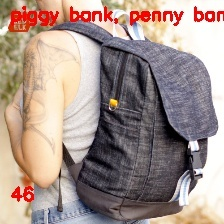

In [9]:
# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)


# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        frame, _ = sock.recvfrom(65536)
        frame = cv2.imdecode(np.frombuffer(frame, dtype=np.uint8), 1)
        if frame is None:
            continue
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()